In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ruta='/content/drive/MyDrive/perro_lucas.png'

<function matplotlib.pyplot.show(close=None, block=None)>

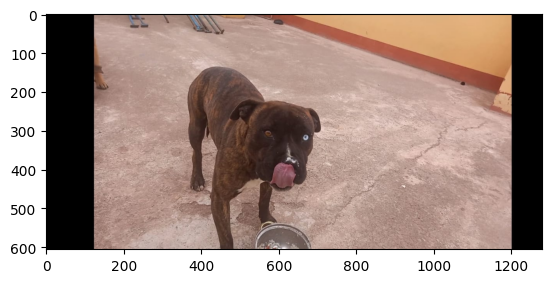

In [ ]:
img=cv2.imread(ruta)
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show

**Translacion**

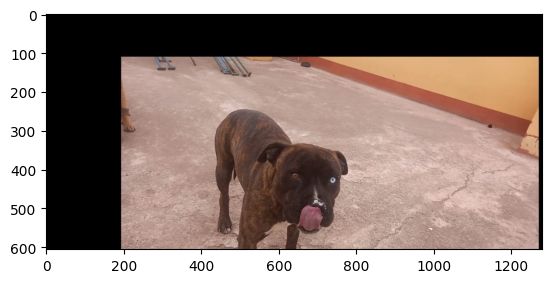

In [ ]:
img=cv2.imread(ruta)
num_rows, num_cols=img.shape[:2]
translation_matrix = np.float32([[1, 0, 70], [0, 1, 110]])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows), cv2.INTER_LINEAR)
img_cvt = cv2.cvtColor(img_translation, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()


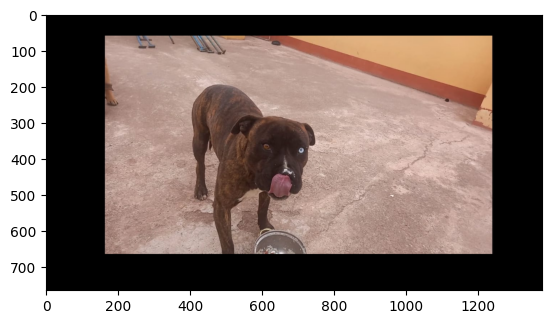

In [ ]:
img = cv2.imread(ruta)
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([[1, 0, 70], [0, 1, 110]])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows + 110))
translation_matrix = np.float32([[1,0,-30],[0,1,-50]])
img_translation = cv2.warpAffine(img_translation, translation_matrix, (num_cols+70+30, num_rows + 110+50))

img_cvt = cv2.cvtColor(img_translation, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

**Border Wrap**

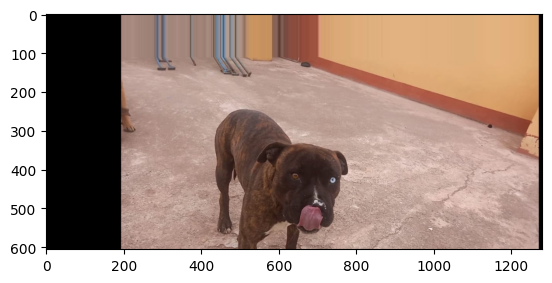

In [ ]:
img = cv2.imread(ruta)
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([[1, 0, 70], [0, 1, 110]])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows), cv2.INTER_LINEAR, cv2.BORDER_WRAP,1)

img_cvt = cv2.cvtColor(img_translation, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()


**Rotacion de Imagenes**

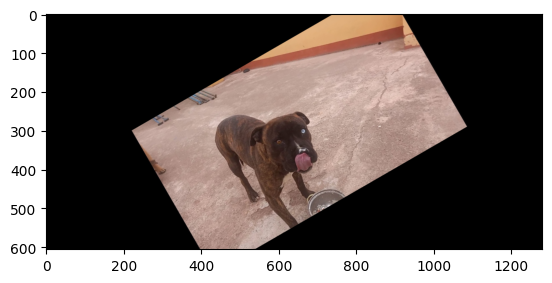

In [ ]:
img = cv2.imread(ruta)
num_rows, num_cols = img.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 0.7)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
img_cvt = cv2.cvtColor(img_rotation, cv2.COLOR_BGR2RGB)

plt.imshow(img_cvt)
plt.show()


**Rotacion y Traslacion**

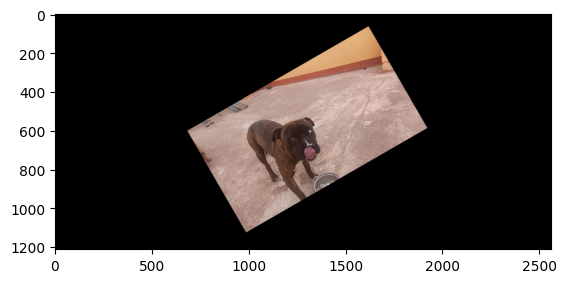

In [ ]:
img = cv2.imread(ruta)
num_rows, num_cols = img.shape[:2]

translation_matrix = np.float32([[1, 0, int(0.5*num_cols)], [0, 1, int(0.5*num_rows)]])
rotation_matrix = cv2.getRotationMatrix2D((num_cols, num_rows), 30, 1)

img_translation = cv2.warpAffine(img, translation_matrix, (2*num_cols, 2*num_rows))
img_rotation = cv2.warpAffine(img_translation, rotation_matrix, (num_cols*2, num_rows*2))

img_cvt = cv2.cvtColor(img_rotation, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()


**Interpolacion Lineal**

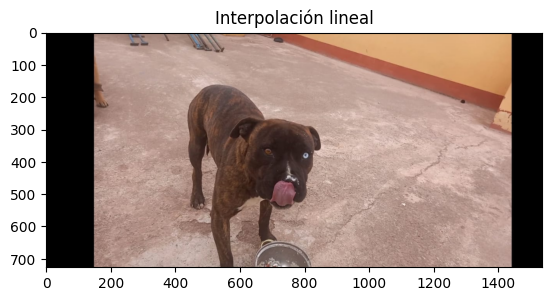

In [ ]:
img = cv2.imread(ruta)
img_scaled = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
img_cvt = cv2.cvtColor(img_scaled, cv2.COLOR_BGR2RGB)

plt.title('Interpolación lineal')
plt.imshow(img_cvt)
plt.show()


**Interpolacion Cubica**

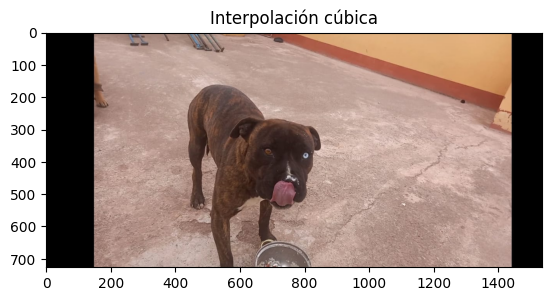

In [ ]:
img_scaled = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
img_cvt = cv2.cvtColor(img_scaled, cv2.COLOR_BGR2RGB)

plt.title('Interpolación cúbica')
plt.imshow(img_cvt)
plt.show()


**lnterpolacion sesgada o interpolacion area**

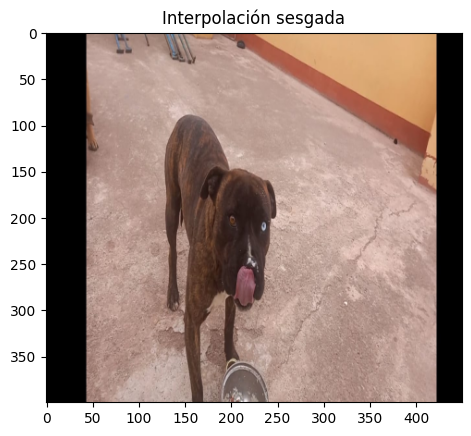

In [ ]:
img_scaled = cv2.resize(img, (450, 400), interpolation=cv2.INTER_AREA)
img_cvt = cv2.cvtColor(img_scaled, cv2.COLOR_BGR2RGB)

plt.title('Interpolación sesgada')
plt.imshow(img_cvt)
plt.show()


**Transformaciones a fines**

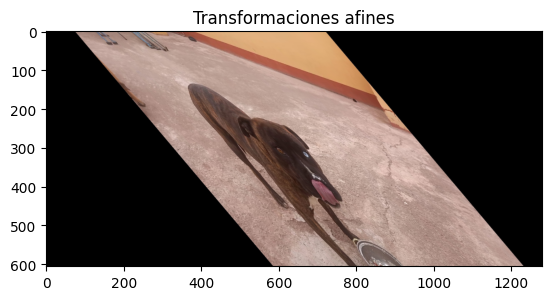

In [ ]:
img = cv2.imread(ruta)
rows, cols = img.shape[:2]
src_points = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
dst_points = np.float32([[0, 0], [int(0.6*(cols - 1)), 0], [int(0.4*(cols - 1)), rows - 1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (cols, rows))
img_cvt = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)

plt.title('Transformaciones afines')
plt.imshow(img_cvt)
plt.show()


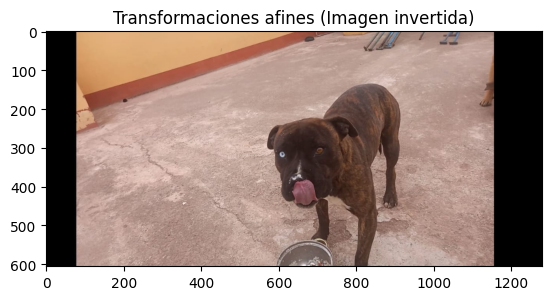

In [19]:
img = cv2.imread(ruta)
rows, cols = img.shape[:2]
src_points = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
dst_points = np.float32([[cols - 1, 0], [0, 0], [cols - 1, rows - 1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (cols, rows))
img_cvt = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)

plt.title('Transformaciones afines (Imagen invertida)')
plt.imshow(img_cvt)
plt.show()


**Transformaciones de Perspectiva**

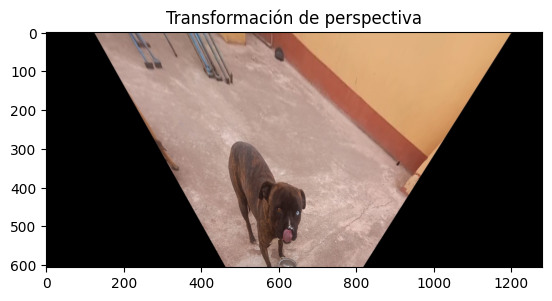

In [20]:
img = cv2.imread(ruta)
rows, cols = img.shape[:2]
src_points = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1], [cols - 1, rows - 1]])
dst_points = np.float32([[0, 0], [cols - 1, 0], [int(0.33*cols), rows - 1], [int(0.66*cols), rows - 1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols, rows))
img_cvt = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)

plt.title('Transformación de perspectiva')
plt.imshow(img_cvt)
plt.show()


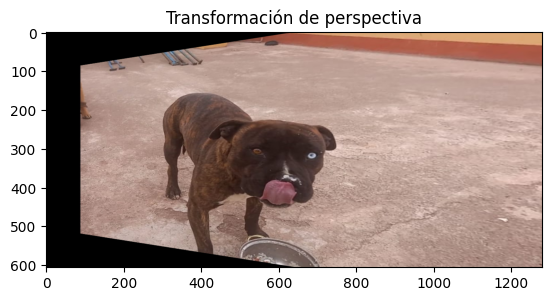

In [21]:
img = cv2.imread(ruta)
rows, cols = img.shape[:2]
src_points = np.float32([[0, 0], [0, rows - 1], [cols / 2, 0], [cols / 2, rows - 1]])
dst_points = np.float32([[0, 100], [0, rows - 101], [cols / 2, 0], [cols / 2, rows - 1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols, rows))
img_cvt = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)

plt.title("Transformación de perspectiva")
plt.imshow(img_cvt)
plt.show()


**Deformacion de Imagen**

In [22]:
import cv2
import numpy as np
import math

img = cv2.imread(ruta)
rows, cols = img.shape[:2]


Ola Vertcal

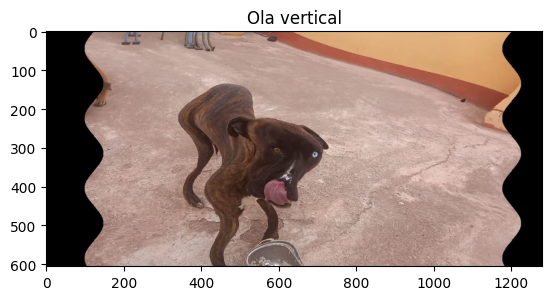

In [23]:
img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(25.0 * math.sin(2 * 3.14 * i / 180))
        offset_y = 0
        
        if j + offset_x < cols:
            img_output[i, j] = img[i, (j + offset_x) % cols]
        else:
            img_output[i, j] = 0

img_cvt = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)
plt.title('Ola vertical')
plt.imshow(img_cvt)
plt.show()


Ola HORIZONAL

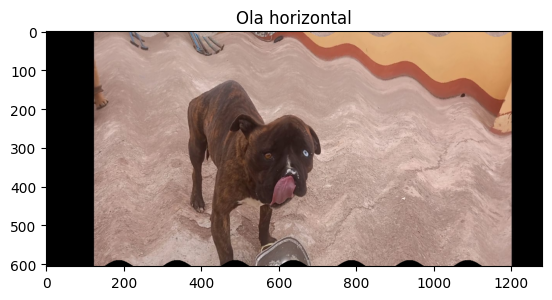

In [24]:
img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = 0
        offset_y = int(16.0 * math.sin(2 * 3.14 * j / 150))
        
        if i + offset_y < rows:
            img_output[i, j] = img[(i + offset_y) % rows, j]
        else:
            img_output[i, j] = 0

img_cvt = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)
plt.title('Ola horizontal')
plt.imshow(img_cvt)
plt.show()


Ola horizontal y Vertical

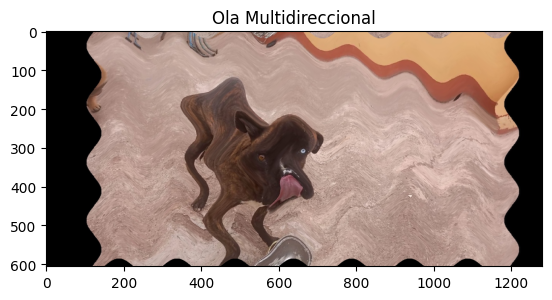

In [25]:
img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(20.0 * math.sin(2 * 3.14 * i / 150))
        offset_y = int(20.0 * math.sin(2 * 3.14 * j / 150))
        
        if i + offset_y < rows and j + offset_x < cols:
            img_output[i, j] = img[(i + offset_y) % rows, (j + offset_x) % cols]
        else:
            img_output[i, j] = 0

img_cvt = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)
plt.title('Ola Multidireccional')
plt.imshow(img_cvt)
plt.show()


**Efecto Concavo Derecho**

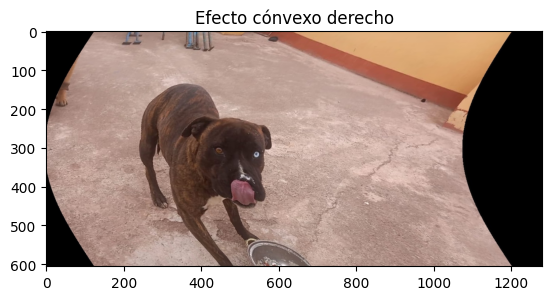

In [26]:
img = cv2.imread(ruta)
rows, cols = img.shape[:2]
img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(128.0 * math.sin(2 * 3.14 * i / (2 * rows)))
        offset_y = 0
        
        if j + offset_x < cols:
            img_output[i, j] = img[i, (j + offset_x) % cols]
        else:
            img_output[i, j] = 0

img_cvt = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)
plt.title('Efecto cónvexo derecho')
plt.imshow(img_cvt)
plt.show()
